# Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip -uq "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset.zip" -d "/content/"

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
#counting the number of images in respective classes
root_dir= "/content/The IQ-OTHNCCD lung cancer dataset"
number_of_images={}

for dir in os.listdir(root_dir):
  number_of_images[dir]= len(os.listdir(os.path.join(root_dir, dir))) 

number_of_images

{'Bengin cases': 120, 'Malignant cases': 561, 'Normal cases': 416}

# Splitting the dataset

*   70% training
*   15% validation
*   15% testing



In [ ]:
def dataFolder (path, split):
  if not os.path.exists("./" + path):
    os.mkdir("./" + path)

    for dir in os.listdir(root_dir):
      os.makedirs("./" + path + "/" + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(root_dir, dir)),
                                  size= (math.floor(split*number_of_images[dir])-5),
                                  replace=False):
        Original = os.path.join(root_dir,dir,img)
        Destination = os.path.join("./" + path, dir)
        shutil.copy(Original, Destination)
        os.remove(Original)
    
    else:
      print(f"{path} folder exists!")

In [ ]:
dataFolder ("Train", 0.7)

Train folder exists!


In [ ]:
dataFolder ("Test", 0.15)

Test folder exists!


In [ ]:
dataFolder ("Validation", 0.15)

Validation folder exists!


In [ ]:
root_dir= "/content/The IQ-OTHNCCD lung cancer dataset"
number_of_images={}

for dir in os.listdir(root_dir):
  number_of_images[dir]= len(os.listdir(os.path.join(root_dir, dir))) 

number_of_images

{'Bengin cases': 15, 'Malignant cases': 16, 'Normal cases': 16}

# Data Preprocessing

In [ ]:
train_dir = "/content/Train"
validation_dir= "/content/Validation"
test_dir= "/content/Test"

*   Read the picture file
*   Decode to JPEG content to RGB grids of pixels
*   Conversion into floating point tensors
*   Rescaling the pixel values (0 to 225) to the [0,1] interval


In [ ]:
from keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
batchsize = 8

train_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )
test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size= batchsize,
    class_mode="categorical"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size= batchsize,
    class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size = batchsize,
    class_mode = 'categorical'
)

Found 752 images belonging to 3 classes.
Found 149 images belonging to 3 classes.
Found 149 images belonging to 3 classes.


In [ ]:
classes = len(train_generator.class_indices)

In [ ]:
train_labels = train_generator.classes 
train_labels = to_categorical(train_labels, num_classes=classes)

## Mobile Net

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input
mobilenet_model = MobileNet(input_shape=(224,224,3), include_top=False)

In [ ]:
mobilenet_model.summary()

In [ ]:
for layer in mobilenet_model.layers:
  layer.trainable = False

In [ ]:
mobilenet_model.summary()

In [ ]:
X = layers.Flatten()(mobilenet_model.output)
X = layers.Dense(classes, activation="softmax")(X)

In [ ]:
model_MN = Model(mobilenet_model.input, X)

In [ ]:
model_MN.summary()

In [ ]:
from tensorflow.keras import optimizers

model_MN.compile(loss="categorical_crossentropy",
              optimizer= optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

ES = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode="auto")

MC = ModelCheckpoint(monitor="val_accuracy", filepath="./Lung_best_MN.h5", verbose=1, save_best_only=True, mode="auto")
cd = [MC]

In [ ]:
history_n = model_MN.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=200,
    callbacks = cd,
    validation_data=validation_generator,
    validation_steps = 8
)

Epoch 1/200
8/8 [==============================] - 2s 238ms/step - loss: 0.4612 - accuracy: 0.8750 - val_loss: 0.3516 - val_accuracy: 0.8750

Epoch 00001: val_accuracy did not improve from 0.92188
Epoch 2/200
8/8 [==============================] - 2s 248ms/step - loss: 0.5425 - accuracy: 0.8438 - val_loss: 0.2752 - val_accuracy: 0.8594

Epoch 00002: val_accuracy did not improve from 0.92188
Epoch 3/200
8/8 [==============================] - 2s 241ms/step - loss: 0.7848 - accuracy: 0.8125 - val_loss: 0.4502 - val_accuracy: 0.9062

Epoch 00003: val_accuracy did not improve from 0.92188
Epoch 4/200
8/8 [==============================] - 2s 245ms/step - loss: 0.5662 - accuracy: 0.8750 - val_loss: 1.2734 - val_accuracy: 0.6562

Epoch 00004: val_accuracy did not improve from 0.92188
Epoch 5/200
8/8 [==============================] - 2s 243ms/step - loss: 0.5512 - accuracy: 0.8438 - val_loss: 0.3155 - val_accuracy: 0.8438

Epoch 00005: val_accuracy did not improve from 0.92188
Epoch 6/200
8/8

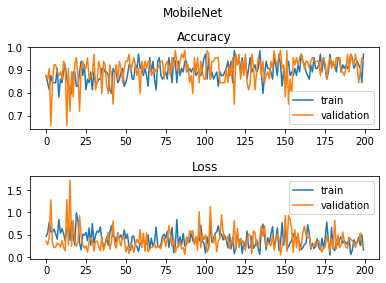

In [ ]:
from matplotlib import pyplot
# plot accuracy during training
pyplot.suptitle("MobileNet")
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_n.history['accuracy'], label='train')
pyplot.plot(history_n.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.tight_layout(pad=3.0)
pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_n.history['loss'], label='train')
pyplot.plot(history_n.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()


In [ ]:
model_mn= load_model("/content/Lung_best_rn.h5")

In [ ]:
acc = model_mn.evaluate_generator(test_generator)
acc

[0.3080357313156128, 0.9328858852386475]

In [ ]:
y_pred = model_mn.predict(test_generator, verbose=1)
y_pred_bool_mn = np.argmax(y_pred, axis=1)

test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=classes)
test_labels = np.argmax(test_labels, axis=1)

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_bool_mn))

19/19 [==============================] - 1s 57ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.59      0.59      0.59        79
           2       0.48      0.54      0.51        57

    accuracy                           0.52       149
   macro avg       0.35      0.38      0.37       149
weighted avg       0.49      0.52      0.51       149



In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
matrix = metrics.confusion_matrix(test_labels, y_pred_bool_mn)
matrix

array([[ 0,  7,  6],
       [ 4, 47, 28],
       [ 0, 26, 31]])

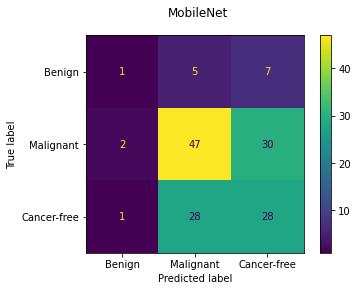

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Benign","Malignant","Cancer-free"])
disp.plot()
plt.suptitle("MobileNet")
plt.show()

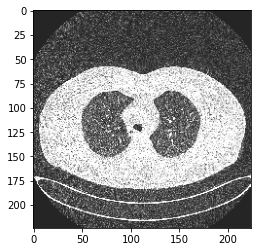

The patient is having Bengin Tumor


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg"
img = load_img(path, target_size=(224,224))

i= img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model_mn.predict(input_arr))

plt.imshow(input_arr[0])
plt.show()

if pred == 1:
  print("The patient is having Malignant Tumor")
elif pred == 0:
  print("The patient is having Bengin Tumor")
else:
  print("The patient is Cancer Free")


#VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model_vgg16.summary()

In [ ]:
for layer in base_model_vgg16.layers:
  layer.trainable = False

In [ ]:
X = layers.Flatten()(base_model_vgg16.output)
X = layers.Dense(classes, activation="softmax")(X)

In [ ]:
model_VGG16 = Model(base_model_vgg16.input, X)

In [ ]:
from tensorflow.keras import optimizers

model_VGG16.compile(loss="categorical_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

ES = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode="auto")

MC = ModelCheckpoint(monitor="val_accuracy", filepath="./Lung_best_vgg16.h5", verbose=1, save_best_only=True, mode="auto")
cd = [MC]

In [ ]:
history_vgg = model_VGG16.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=200,
    callbacks = cd,
    validation_data=validation_generator,
    validation_steps = 8
)

Epoch 1/200
8/8 [==============================] - 3s 360ms/step - loss: 1.1836 - accuracy: 0.5000 - val_loss: 0.8168 - val_accuracy: 0.6719

Epoch 00001: val_accuracy improved from -inf to 0.67188, saving model to ./Lung_best_vgg16.h5
Epoch 2/200
8/8 [==============================] - 3s 324ms/step - loss: 0.8021 - accuracy: 0.6719 - val_loss: 0.6563 - val_accuracy: 0.7031

Epoch 00002: val_accuracy improved from 0.67188 to 0.70312, saving model to ./Lung_best_vgg16.h5
Epoch 3/200
8/8 [==============================] - 2s 321ms/step - loss: 0.7886 - accuracy: 0.6719 - val_loss: 0.7240 - val_accuracy: 0.7812

Epoch 00003: val_accuracy improved from 0.70312 to 0.78125, saving model to ./Lung_best_vgg16.h5
Epoch 4/200
8/8 [==============================] - 3s 319ms/step - loss: 0.8167 - accuracy: 0.7500 - val_loss: 0.6669 - val_accuracy: 0.8438

Epoch 00004: val_accuracy improved from 0.78125 to 0.84375, saving model to ./Lung_best_vgg16.h5
Epoch 5/200
8/8 [==============================

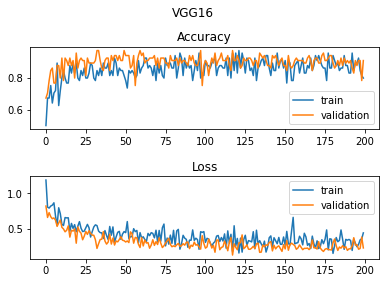

In [ ]:
from matplotlib import pyplot
# plot accuracy during training
pyplot.suptitle("VGG16")
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_vgg.history['accuracy'], label='train')
pyplot.plot(history_vgg.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.tight_layout(pad=3.0)
pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_vgg.history['loss'], label='train')
pyplot.plot(history_vgg.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
model_vgg16= load_model("/content/Lung_best_vgg16.h5")
acc = model_vgg16.evaluate_generator(test_generator)
acc

[0.36066895723342896, 0.8724831938743591]

In [ ]:
y_pred = model_vgg16.predict(test_generator, batch_size=10, verbose=1)
y_pred_bool_vgg = np.argmax(y_pred, axis=1)

test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=classes)
test_labels = np.argmax(test_labels, axis=1)

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_bool_vgg))

19/19 [==============================] - 2s 108ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.53      0.54        79
           2       0.37      0.47      0.42        57

    accuracy                           0.46       149
   macro avg       0.31      0.34      0.32       149
weighted avg       0.43      0.46      0.45       149



In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = metrics.confusion_matrix(test_labels, y_pred_bool_vgg)
matrix

array([[ 0,  4,  9],
       [ 0, 42, 37],
       [ 0, 30, 27]])

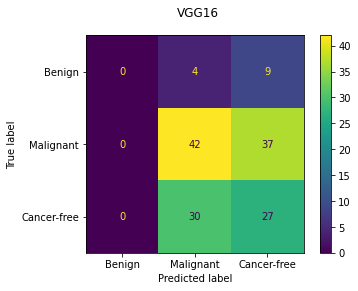

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Benign","Malignant","Cancer-free"])
disp.plot()
plt.suptitle("VGG16")
plt.show()

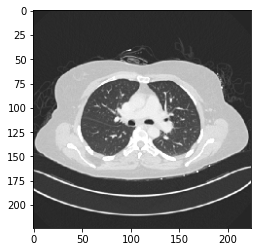

The patient is having Malignant Tumor


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (137).jpg"
img = load_img(path, target_size=(224,224))

i= img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model_vgg16.predict(input_arr))

plt.imshow(input_arr[0])
plt.show()

if pred == 1:
  print("The patient is having Malignant Tumor")
elif pred == 0:
  print("The patient is having Bengin Tumor")
else:
  print("The patient is Cancer Free")


#VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
#ase_model_vgg19.summary()

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model_vgg19.layers:
  layer.trainable = False


X = layers.Flatten()(base_model_vgg19.output)
X = layers.Dense(classes, activation="softmax")(X)

model_VGG19 = Model(base_model_vgg19.input, X)

model_VGG19.compile(loss="categorical_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


ES = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode="auto")
MC = ModelCheckpoint(monitor="val_accuracy", filepath="./Lung_best_vgg19.h5", verbose=1, save_best_only=True, mode="auto")
cd = [MC]

history_vgg19 = model_VGG19.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=200,
    callbacks = cd,
    validation_data=validation_generator,
    validation_steps = 8
)

Epoch 1/200
8/8 [==============================] - 4s 405ms/step - loss: 1.0545 - accuracy: 0.4531 - val_loss: 0.8639 - val_accuracy: 0.5625

Epoch 00001: val_accuracy improved from -inf to 0.56250, saving model to ./Lung_best_vgg19.h5
Epoch 2/200
8/8 [==============================] - 3s 356ms/step - loss: 0.8569 - accuracy: 0.6094 - val_loss: 0.7144 - val_accuracy: 0.6875

Epoch 00002: val_accuracy improved from 0.56250 to 0.68750, saving model to ./Lung_best_vgg19.h5
Epoch 3/200
8/8 [==============================] - 3s 355ms/step - loss: 0.9622 - accuracy: 0.5469 - val_loss: 0.7938 - val_accuracy: 0.7344

Epoch 00003: val_accuracy improved from 0.68750 to 0.73438, saving model to ./Lung_best_vgg19.h5
Epoch 4/200
8/8 [==============================] - 3s 359ms/step - loss: 0.8757 - accuracy: 0.6094 - val_loss: 0.6744 - val_accuracy: 0.8281

Epoch 00004: val_accuracy improved from 0.73438 to 0.82812, saving model to ./Lung_best_vgg19.h5
Epoch 5/200
8/8 [==============================

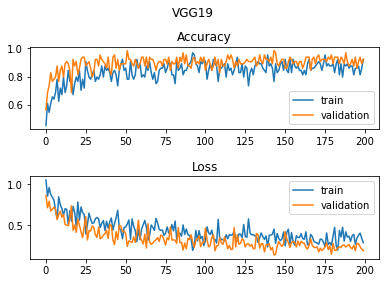

In [ ]:
from matplotlib import pyplot
pyplot.suptitle("VGG19")
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_vgg19.history['accuracy'], label='train')
pyplot.plot(history_vgg19.history['val_accuracy'], label='validation')
pyplot.legend()


pyplot.tight_layout(pad=3.0)

pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_vgg19.history['loss'], label='train')
pyplot.plot(history_vgg19.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
model_vgg19= load_model("/content/Lung_best_vgg19.h5")
acc = model_vgg19.evaluate_generator(test_generator)
acc

[0.403415709733963, 0.8590604066848755]

In [ ]:
y_pred = model_vgg19.predict(test_generator, batch_size=10, verbose=1)
y_pred_bool_vgg19 = np.argmax(y_pred, axis=1)

test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=classes)
test_labels = np.argmax(test_labels, axis=1)

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_bool_vgg19))

19/19 [==============================] - 2s 127ms/step
              precision    recall  f1-score   support

           0       0.14      0.08      0.10        13
           1       0.64      0.63      0.64        79
           2       0.50      0.56      0.53        57

    accuracy                           0.56       149
   macro avg       0.43      0.42      0.42       149
weighted avg       0.54      0.56      0.55       149



In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = metrics.confusion_matrix(test_labels, y_pred_bool_vgg19)
matrix

array([[ 1,  6,  6],
       [ 3, 50, 26],
       [ 3, 22, 32]])

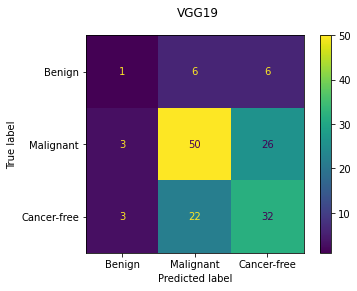

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Benign","Malignant","Cancer-free"])
disp.plot()
plt.suptitle("VGG19")
plt.show()

#DenseNet

In [ ]:
from keras.applications.densenet import DenseNet201
base_model_DN = DenseNet201(weights='imagenet', include_top=False, input_shape=(224,224,3))
#base_model_DN.summary()

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:


for layer in base_model_DN.layers:
  layer.trainable = False


X = layers.Flatten()(base_model_DN.output)
X = layers.Dense(classes, activation="softmax")(X)

model_dn = Model(base_model_DN.input, X)

model_dn.compile(loss="categorical_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [ ]:
ES = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode="auto")
MC = ModelCheckpoint(monitor="val_accuracy", filepath="./Lung_best_dn.h5", verbose=1, save_best_only=True, mode="auto")
cd = [MC]

history_dn = model_dn.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=200,
    callbacks = cd,
    validation_data=validation_generator,
    validation_steps = 8
)

Epoch 1/200
8/8 [==============================] - 21s 834ms/step - loss: 3.3772 - accuracy: 0.3438 - val_loss: 0.9692 - val_accuracy: 0.7031

Epoch 00001: val_accuracy improved from -inf to 0.70312, saving model to ./Lung_best_dn.h5
Epoch 2/200
8/8 [==============================] - 3s 332ms/step - loss: 1.1714 - accuracy: 0.6250 - val_loss: 0.6292 - val_accuracy: 0.8438

Epoch 00002: val_accuracy improved from 0.70312 to 0.84375, saving model to ./Lung_best_dn.h5
Epoch 3/200
8/8 [==============================] - 3s 340ms/step - loss: 0.7776 - accuracy: 0.7344 - val_loss: 0.8113 - val_accuracy: 0.8438

Epoch 00003: val_accuracy did not improve from 0.84375
Epoch 4/200
8/8 [==============================] - 3s 337ms/step - loss: 1.0616 - accuracy: 0.7500 - val_loss: 0.4229 - val_accuracy: 0.8125

Epoch 00004: val_accuracy did not improve from 0.84375
Epoch 5/200
8/8 [==============================] - 3s 336ms/step - loss: 0.9745 - accuracy: 0.6875 - val_loss: 0.8787 - val_accuracy: 0.

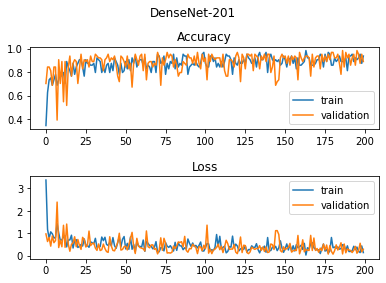

In [ ]:
from matplotlib import pyplot
pyplot.suptitle("DenseNet-201")
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_dn.history['accuracy'], label='train')
pyplot.plot(history_dn.history['val_accuracy'], label='validation')
pyplot.legend()


pyplot.tight_layout(pad=3.0)

pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_dn.history['loss'], label='train')
pyplot.plot(history_dn.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
model_DN= load_model("/content/Lung_best_dn.h5")
acc = model_dn.evaluate_generator(test_generator)
acc

[0.36053234338760376, 0.899328887462616]

In [ ]:
y_pred = model_DN.predict(test_generator, verbose=1)
y_pred_bool_dn = np.argmax(y_pred, axis=1)

test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=classes)
test_labels = np.argmax(test_labels, axis=1)

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_bool_dn))

19/19 [==============================] - 2s 106ms/step
              precision    recall  f1-score   support

           0       0.10      0.15      0.12        13
           1       0.62      0.57      0.60        79
           2       0.57      0.56      0.57        57

    accuracy                           0.53       149
   macro avg       0.43      0.43      0.43       149
weighted avg       0.56      0.53      0.54       149



In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = metrics.confusion_matrix(test_labels, y_pred_bool_dn)
matrix

array([[ 2,  8,  3],
       [13, 45, 21],
       [ 6, 19, 32]])

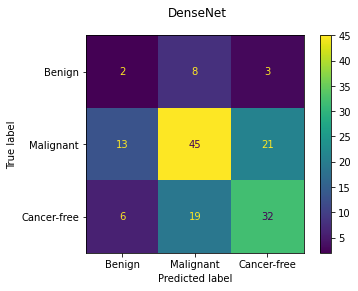

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Benign","Malignant","Cancer-free"])
disp.plot()
plt.suptitle("DenseNet")
plt.show()

#ResNet

In [ ]:
from keras.applications.resnet import ResNet101
base_model_RN = ResNet101(weights='imagenet', include_top=False, input_shape=(224,224,3))
#base_model_RN.summary()

171458560/171446536 [==============================] - 2s 0us/step


In [ ]:


for layer in base_model_RN.layers:
  layer.trainable = False


X = layers.Flatten()(base_model_RN.output)
X = layers.Dense(classes, activation="softmax")(X)

model_rn = Model(base_model_RN.input, X)

model_rn.compile(loss="categorical_crossentropy",
              optimizer= optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


ES = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=10, verbose=1, mode="auto")
MC = ModelCheckpoint(monitor="val_accuracy", filepath="./Lung_best_rn.h5", verbose=1, save_best_only=True, mode="auto")
cd = [MC]

history_rn = model_rn.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=200,
    callbacks = cd,
    validation_data=validation_generator,
    validation_steps = 8
)

Epoch 1/200
8/8 [==============================] - 12s 658ms/step - loss: 1.5192 - accuracy: 0.4219 - val_loss: 1.3233 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to ./Lung_best_rn.h5
Epoch 2/200
8/8 [==============================] - 3s 368ms/step - loss: 1.0370 - accuracy: 0.4531 - val_loss: 1.1768 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.53125
Epoch 3/200
8/8 [==============================] - 3s 362ms/step - loss: 1.0661 - accuracy: 0.4531 - val_loss: 0.8334 - val_accuracy: 0.6406

Epoch 00003: val_accuracy improved from 0.53125 to 0.64062, saving model to ./Lung_best_rn.h5
Epoch 4/200
8/8 [==============================] - 3s 358ms/step - loss: 0.8929 - accuracy: 0.6406 - val_loss: 0.7453 - val_accuracy: 0.6406

Epoch 00004: val_accuracy did not improve from 0.64062
Epoch 5/200
8/8 [==============================] - 3s 363ms/step - loss: 1.1783 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.

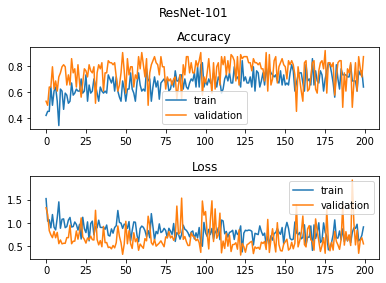

In [ ]:
from matplotlib import pyplot
pyplot.suptitle("ResNet-101")
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_rn.history['accuracy'], label='train')
pyplot.plot(history_rn.history['val_accuracy'], label='validation')
pyplot.legend()


pyplot.tight_layout(pad=3.0)

pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_rn.history['loss'], label='train')
pyplot.plot(history_rn.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
model_RN= load_model("/content/Lung_best_rn.h5")
acc = model_rn.evaluate_generator(test_generator)
acc

[0.6187693476676941, 0.818791925907135]

In [ ]:
y_pred = model_RN.predict(test_generator, batch_size=10, verbose=1)
y_pred_bool_rn = np.argmax(y_pred, axis=1)

test_labels = test_generator.classes 
test_labels = to_categorical(test_labels, num_classes=classes)
test_labels = np.argmax(test_labels, axis=1)

from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_bool_rn))

19/19 [==============================] - 2s 130ms/step
              precision    recall  f1-score   support

           0       0.25      0.08      0.12        13
           1       0.55      0.56      0.55        79
           2       0.42      0.47      0.44        57

    accuracy                           0.48       149
   macro avg       0.41      0.37      0.37       149
weighted avg       0.47      0.48      0.47       149



In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = metrics.confusion_matrix(test_labels, y_pred_bool_rn)
matrix

array([[ 1,  6,  6],
       [ 3, 44, 32],
       [ 0, 30, 27]])

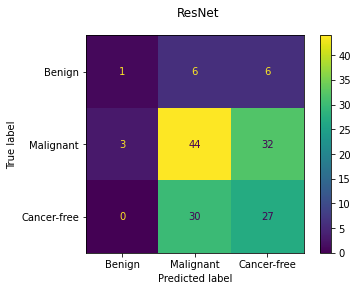

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Benign","Malignant","Cancer-free"])
disp.plot()
plt.suptitle("ResNet")
plt.show()